In [ ]:
# Amul Neupane
##Computer Vision


There are 4 image classes, each with 5 images.They are Bell, Bird, Camel and Fly`
TASK AT HAND:
1.create 1D feature vectors of centroid distances for 20 different silhouette pattern/object.
2.perform template-based matching on them
3.Perform feature-based matching on them



In [ ]:
#Computing 1D Feature Vectors

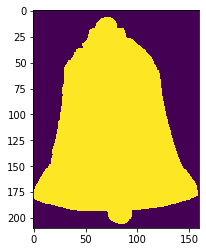

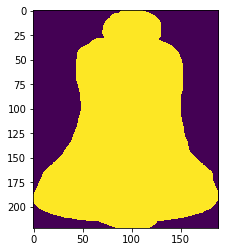

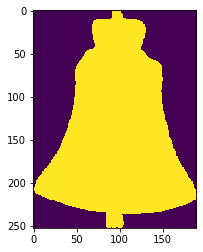

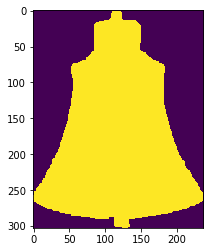

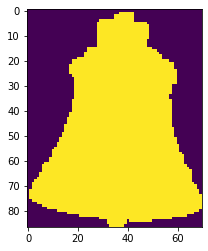

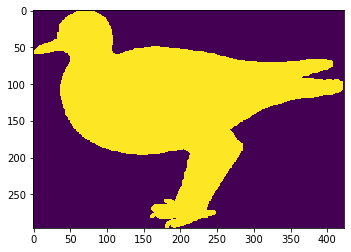

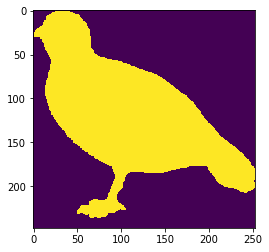

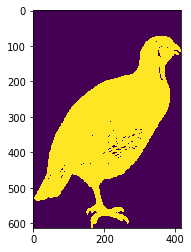

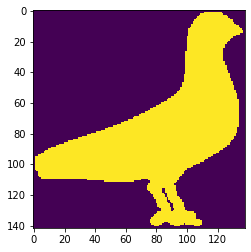

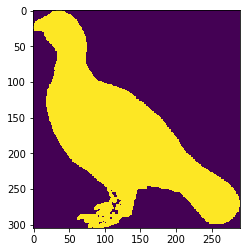

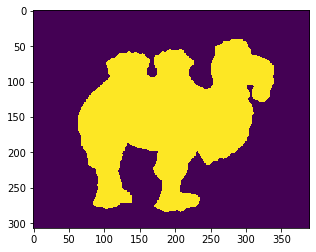

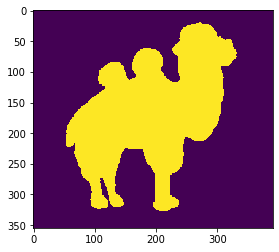

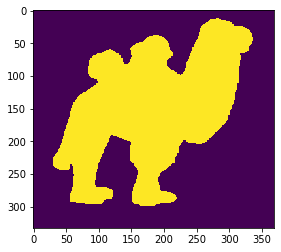

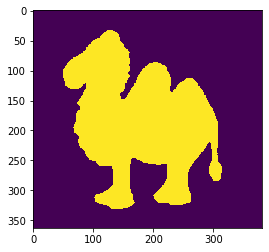

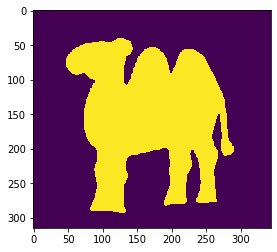

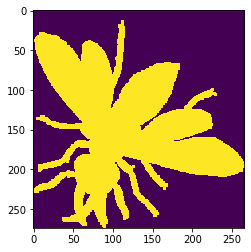

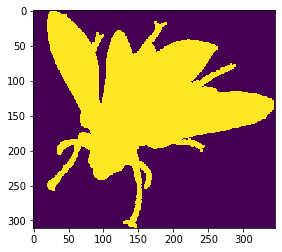

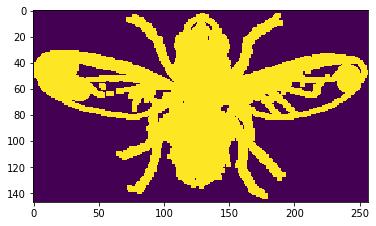

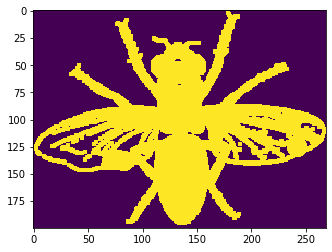

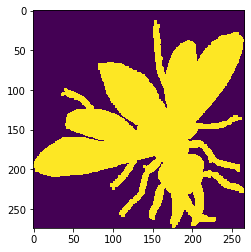

In [39]:
from PIL import Image, ImageFilter, ImageChops
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv

#reading images
img1cls1  = mpimg.imread('Bell_1.jpg')
img2cls1  = mpimg.imread('Bell_2.jpg')
img3cls1  = mpimg.imread('Bell_3.jpg')
img4cls1  = mpimg.imread('Bell_4.jpg')
img5cls1  = mpimg.imread('Bell_5.jpg')

img1cls2  = mpimg.imread('Bird_1.jpg')
img2cls2  = mpimg.imread('Bird_2.jpg')
img3cls2  = mpimg.imread('Bird_3.jpg')
img4cls2  = mpimg.imread('Bird_4.jpg')
img5cls2  = mpimg.imread('Bird_5.jpg')

img1cls3  = mpimg.imread('Camel_1.jpg')
img2cls3  = mpimg.imread('Camel_2.jpg')
img3cls3  = mpimg.imread('Camel_3.jpg')
img4cls3  = mpimg.imread('Camel_4.jpg')
img5cls3  = mpimg.imread('Camel_5.jpg')

img1cls4  = mpimg.imread('Fly_1.jpg')
img2cls4  = mpimg.imread('Fly_2.jpg')
img3cls4  = mpimg.imread('Fly_3.jpg')
img4cls4  = mpimg.imread('Fly_4.jpg')
img5cls4  = mpimg.imread('Fly_5.jpg')


ret,img1c1 = cv.threshold(img1cls1,127,255,0)
ret,img2c1 = cv.threshold(img2cls1,127,255,0)
ret,img3c1 = cv.threshold(img3cls1,127,255,0)
ret,img4c1 = cv.threshold(img4cls1,127,255,0)
ret,img5c1 = cv.threshold(img5cls1,127,255,0)

ret,img1c2 = cv.threshold(img1cls2,127,255,0)
ret,img2c2 = cv.threshold(img2cls2,127,255,0)
ret,img3c2 = cv.threshold(img3cls2,127,255,0)
ret,img4c2 = cv.threshold(img4cls2,127,255,0)
ret,img5c2 = cv.threshold(img5cls2,127,255,0)

ret,img1c3 = cv.threshold(img1cls3,127,255,0)
ret,img2c3 = cv.threshold(img2cls3,127,255,0)
ret,img3c3 = cv.threshold(img3cls3,127,255,0)
ret,img4c3 = cv.threshold(img4cls3,127,255,0)
ret,img5c3 = cv.threshold(img5cls3,127,255,0)

ret,img1c4 = cv.threshold(img1cls4,127,255,0)
ret,img2c4 = cv.threshold(img2cls4,127,255,0)
ret,img3c4 = cv.threshold(img3cls4,127,255,0)
ret,img4c4 = cv.threshold(img4cls4,127,255,0)
ret,img5c4 = cv.threshold(img5cls4,127,255,0)



imgs= [img1c1, img2c1, img3c1,
        img4c1, img5c1, img1c2,
        img2c2, img3c2,img4c2, 
         img5c2,img1c3, img2c3,
        img3c3, img4c3,img5c3,img1c4,
        img2c4, img3c4, img4c4,img5c4]

for i in range(20):
    plt.figure()
    plt.imshow(imgs[i])

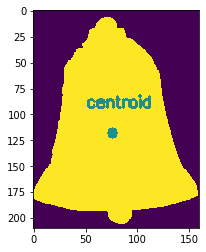

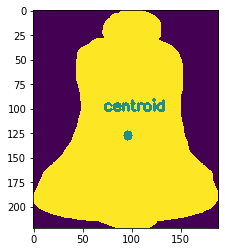

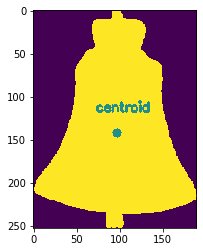

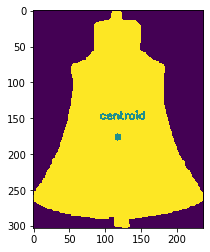

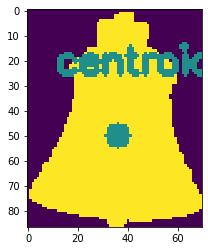

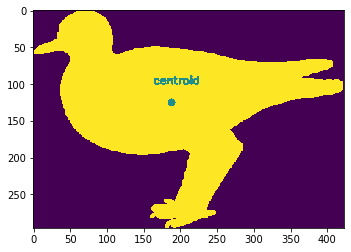

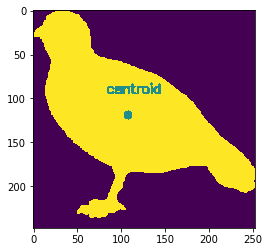

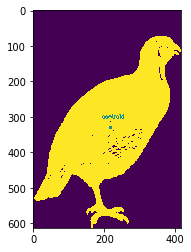

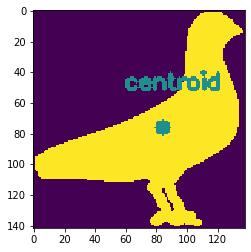

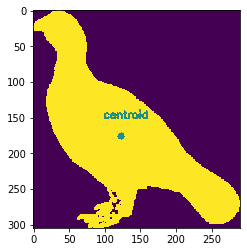

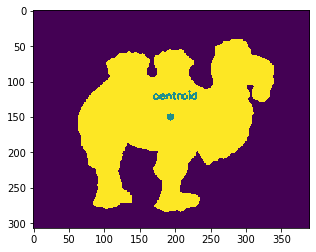

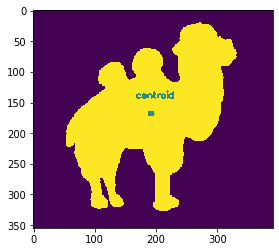

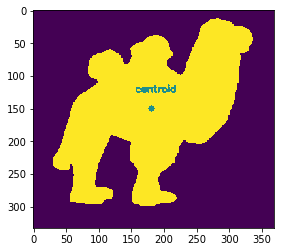

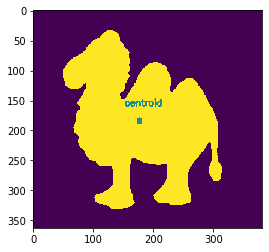

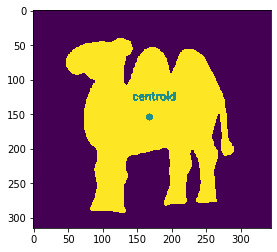

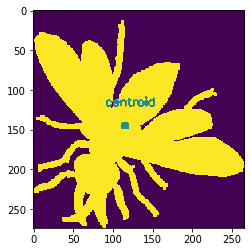

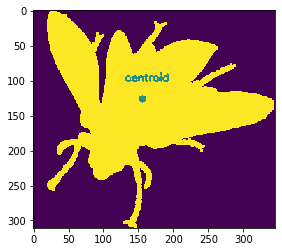

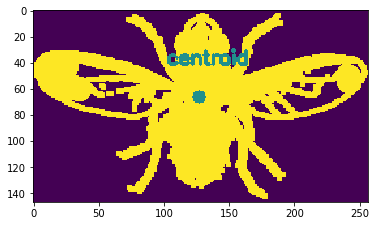

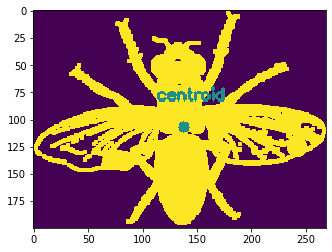

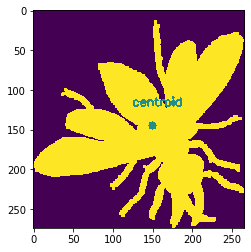

In [40]:
#Finding centroid

imgsLabeled = np.empty(20, dtype=object) 
cX = np.empty(20, dtype=object) 
cY = np.empty(20, dtype=object) 

for i in range(20):
    M = cv.moments(imgs[i])
    cX[i] = int(M["m10"] / M["m00"])
    cY[i] = int(M["m01"] / M["m00"])
    imgsLabeled[i] = imgs[i].copy()
    cv.circle(imgsLabeled[i], (cX[i], cY[i]), 5, (127, 127, 127), -1)
    cv.putText(imgsLabeled[i], "centroid", (cX[i] - 25, cY[i] - 25),cv.FONT_HERSHEY_SIMPLEX, 0.5, (127, 127, 127), 2)
    plt.figure()
    plt.imshow(imgsLabeled[i])

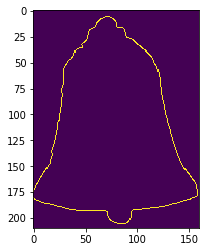

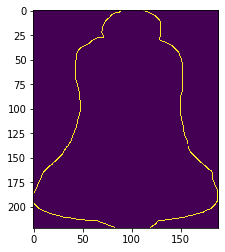

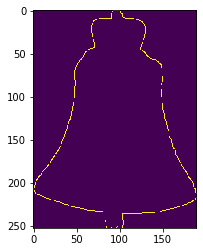

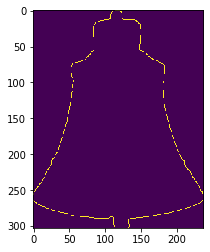

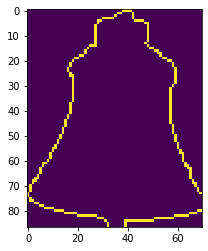

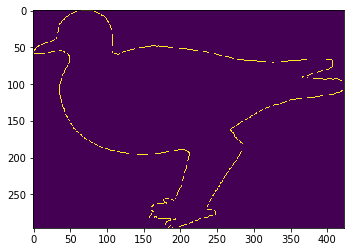

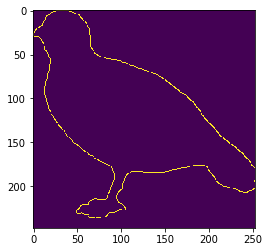

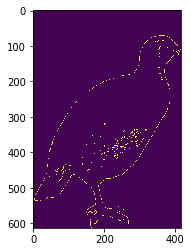

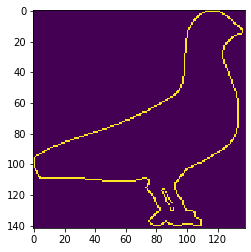

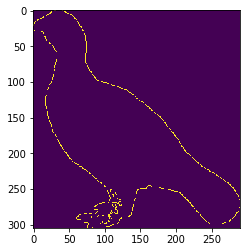

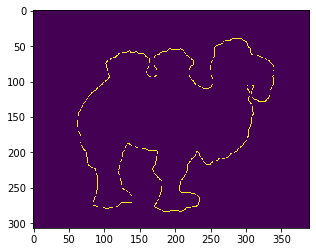

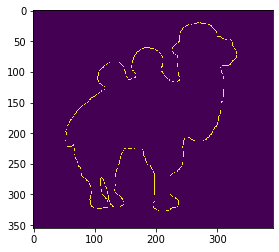

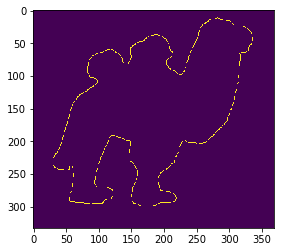

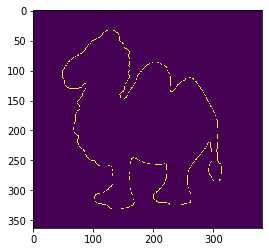

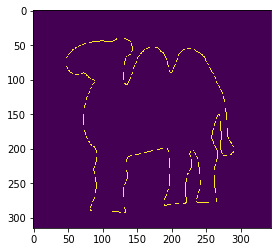

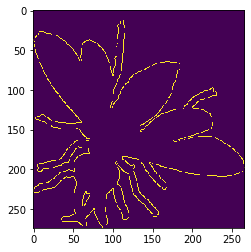

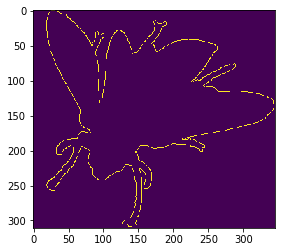

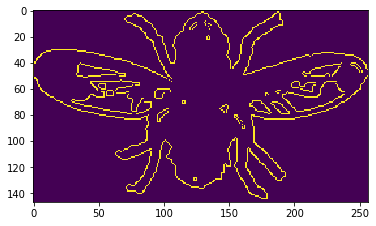

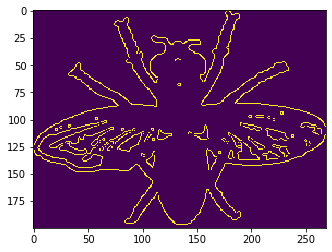

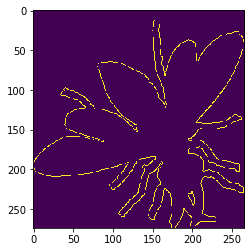

In [41]:
# Finding the edges of each image

imgEdges = np.empty(20, dtype=object) 

for i in range(20):
    imgEdges[i] = cv.Canny(imgs[i],100,200)
    plt.figure()
    plt.imshow(imgEdges[i])

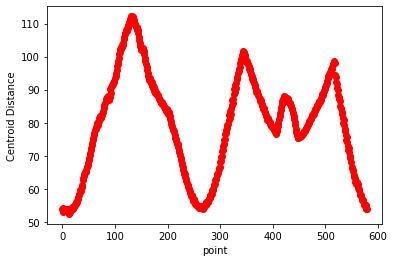

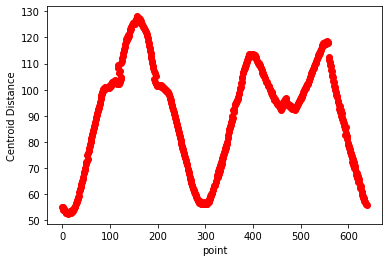

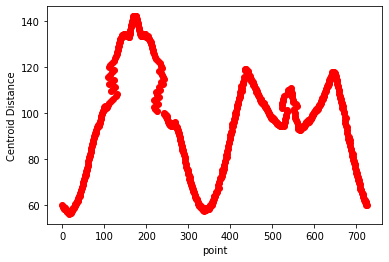

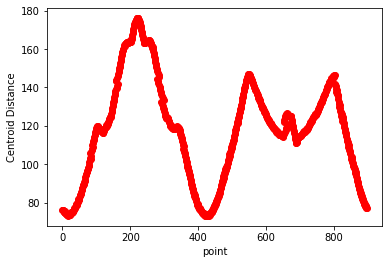

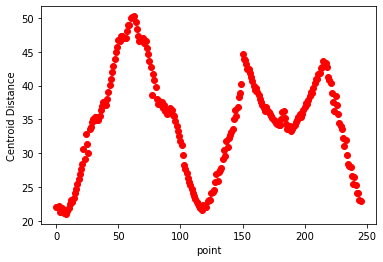

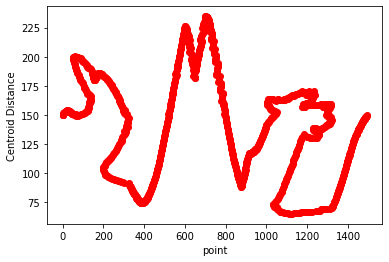

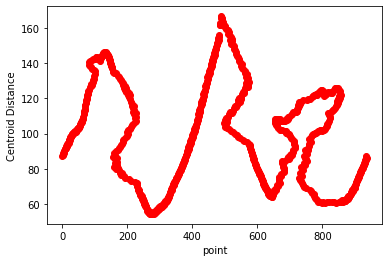

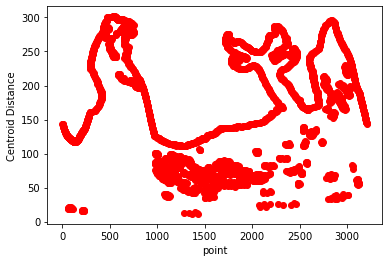

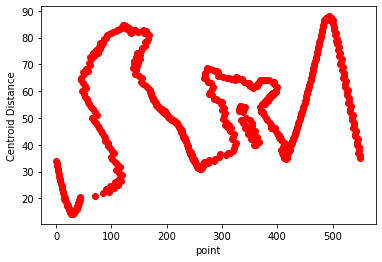

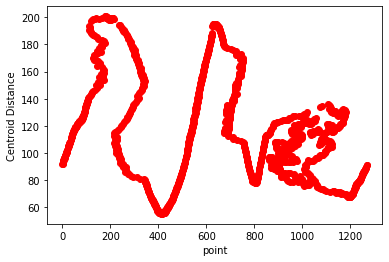

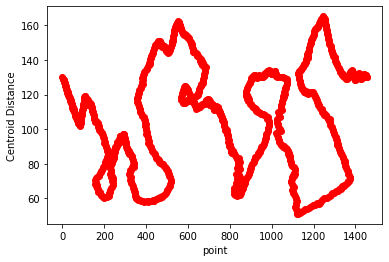

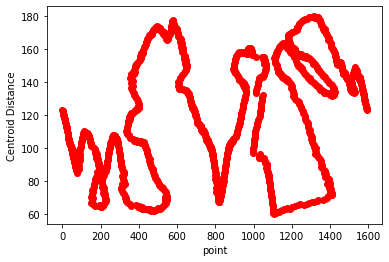

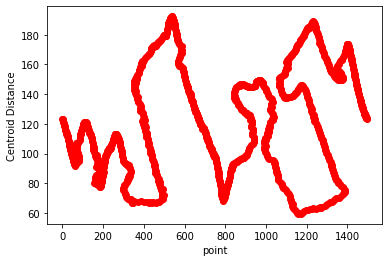

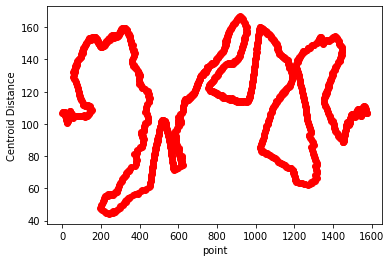

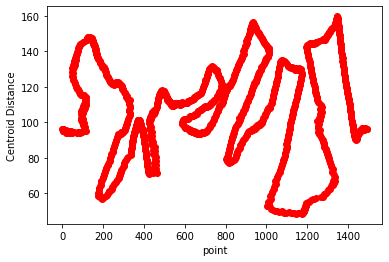

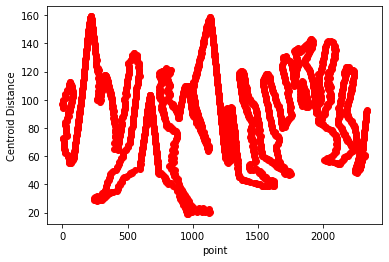

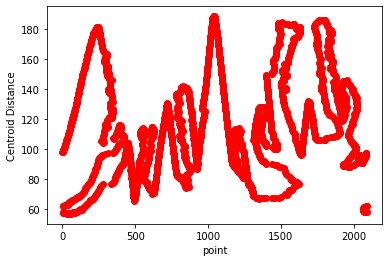

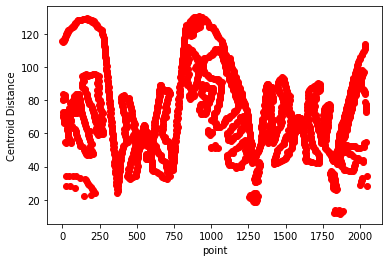

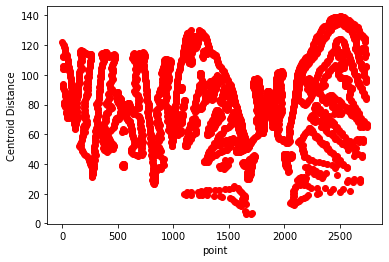

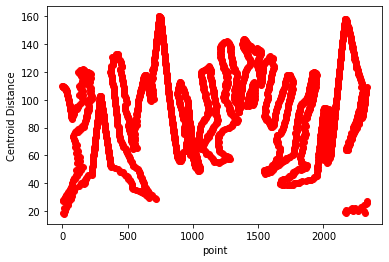

In [42]:
# Create vectors to hold edge coordinates
edgeCoordinates = [ [] for _ in range(20) ]

# Find each edge pixel to centroid and add it to its respective vector

for i in range(20):
    for j in range(imgEdges[i].shape[0]):
        for k in range(imgEdges[i].shape[1]):
            if imgEdges[i][j,k] == 255:
                edgeCoordinates[i].append([j,k])
                
# Create vectors to hold edge coordinate and centroid angles
angles = [ [] for _ in range(20) ]

# find angle of each line and sort edge coordinates by angle to centroid  
for i in range(20):
    for j in edgeCoordinates[i]:
        angles[i].append(math.atan2(j[0] - cY[i], j[1] - cX[i]))
    angles[i], edgeCoordinates[i] = (list(t) for t in zip(*sorted(zip(angles[i], edgeCoordinates[i]))))
    
# Create 1D feature vectors
featureVectors = [ [] for _ in range(20) ]

# Find distance from each edge pixel to centroid and add it to feature vector
for i in range(20):
    for j in edgeCoordinates[i]:
        featureVectors[i].append(np.sqrt((j[0]-cY[i])**2 + (j[1]-cX[i])**2))
        
for i in range(0,20):
    x1 = np.arange(0, len(featureVectors[i]))
    plt.xlabel("point")  
    plt.ylabel("Centroid Distance")  
    
    plt.plot(x1, featureVectors[i], 'o', color ="red")  
    plt.show()        

In [ ]:
#Template-Based Matching

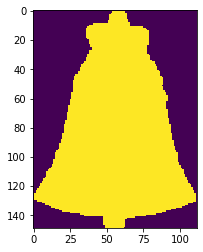

In [43]:
templateimage  = mpimg.imread('templateImage.jpg')
ret,templateimage1 = cv.threshold(templateimage,127,255,0)


plt.figure()
plt.imshow(templateimage1)

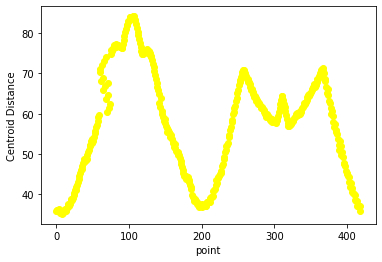

In [44]:
Mt = cv.moments(templateimage1)
cXt = int(Mt["m10"] / Mt["m00"])
cYt = int(Mt["m01"] / Mt["m00"])

templateEdges = cv.Canny(templateimage1,100,200)

templateEdgeCoordinates = []
templateAngles = []
templateFeatureVector = []

for j in range(templateEdges.shape[0]):
    for k in range(templateEdges.shape[1]):
        if templateEdges[j,k] == 255:
            templateEdgeCoordinates.append([j,k])

for j in templateEdgeCoordinates:
    templateAngles.append(math.atan2(j[0] - cYt, j[1] - cXt))
    
templateAngles, templateEdgeCoordinates = (list(t) for t in zip(*sorted(zip(templateAngles, templateEdgeCoordinates))))

for j in templateEdgeCoordinates:
    templateFeatureVector.append(np.sqrt((j[0]-cYt)**2 + (j[1]-cXt)**2))
    
x1 = np.arange(0, len(templateFeatureVector))
plt.xlabel("point")  
plt.ylabel("Centroid Distance")  
plt.plot(x1, templateFeatureVector, 'o', color ="yellow")  
plt.show()

In [45]:
dtw_template =  np.empty(20, dtype=object)
distance_template = np.zeros(20)

for i in range(20):
    n, m = len(featureVectors[i]), len(templateFeatureVector)
    dtw_template[i] = np.zeros((n+1, m+1))
    for k in range(n+1):
        for l in range(m+1):
            dtw_template[i][k, l] = np.inf
    dtw_template[i][0, 0] = 0
    
    for k in range(1, n+1):
        cost = abs(featureVectors[i][k-1] - templateFeatureVector[0])
        last_min = dtw_template[i][k-1, 0]
        dtw_template[i][k, 0] = cost + last_min
        
    for l in range(1, m+1):
        cost = abs(featureVectors[i][0] - templateFeatureVector[l-1])
        last_min = dtw_template[i][0, l-1]
        dtw_template[i][0, l] = cost + last_min
    
    for k in range(1, n+1):
        for l in range(1, m+1):
            cost = abs(featureVectors[i][k-1] - templateFeatureVector[l-1])
            last_min = np.min([dtw_template[i][k-1, l], dtw_template[i][k, l-1], dtw_template[i][k-1, l-1]])
            dtw_template[i][k, l] = cost + last_min
    
    distance_template[i] = dtw_template[i][n, m]

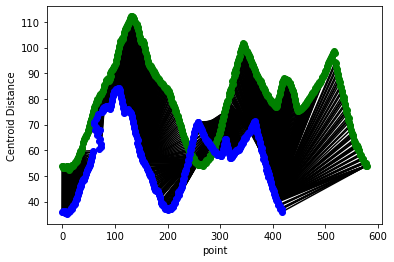

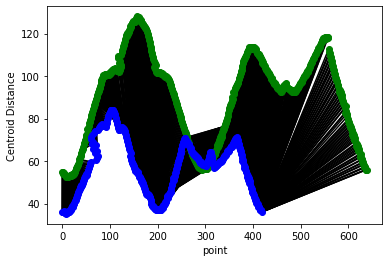

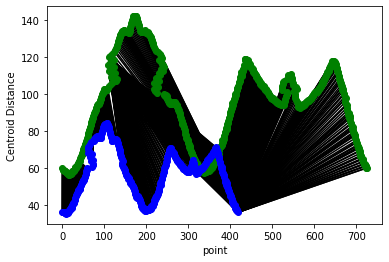

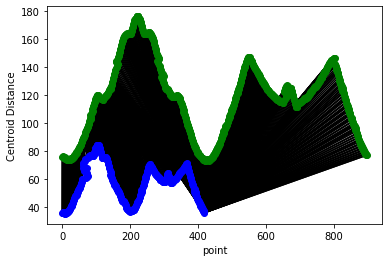

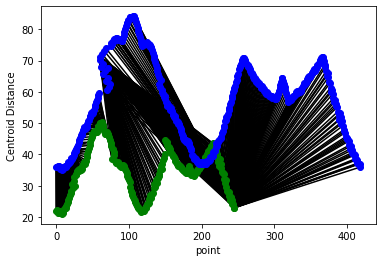

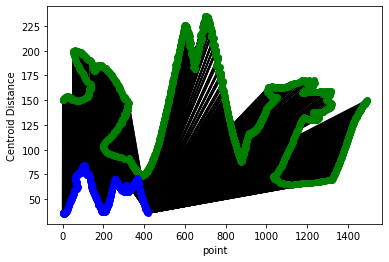

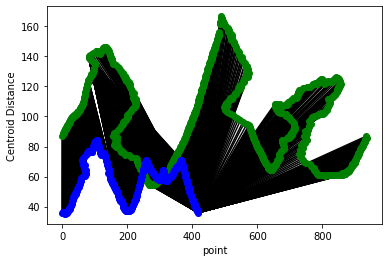

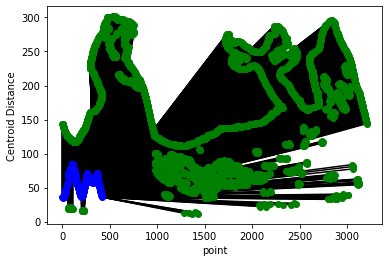

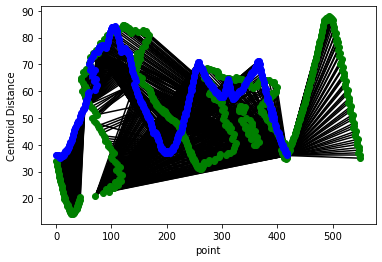

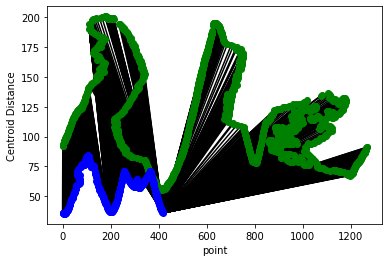

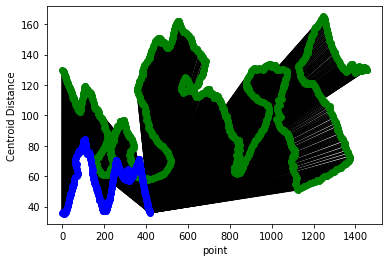

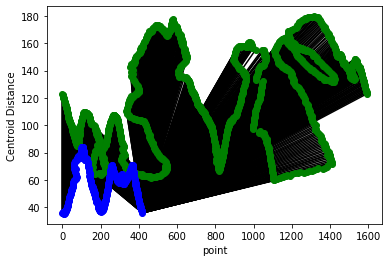

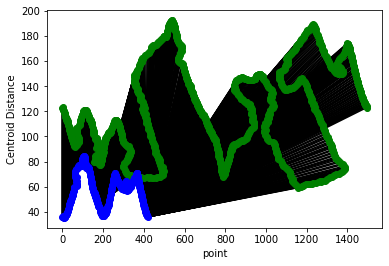

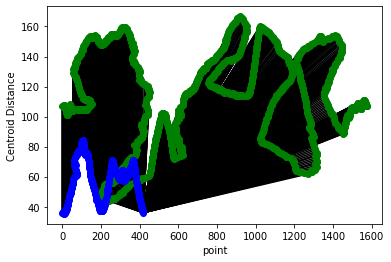

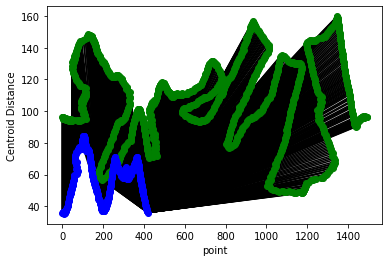

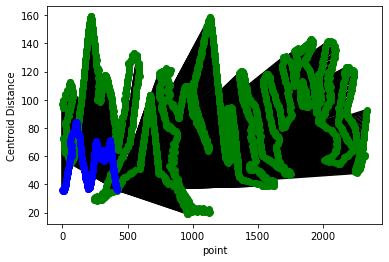

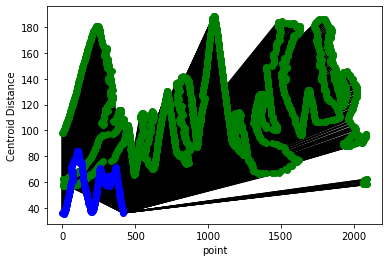

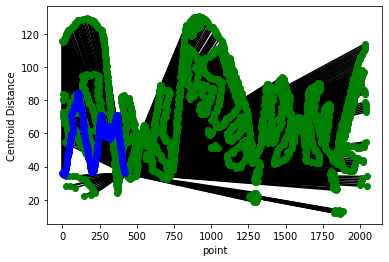

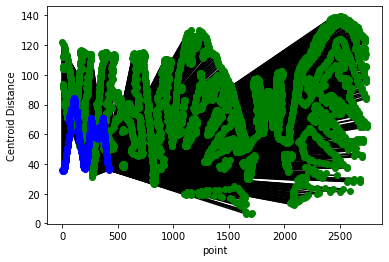

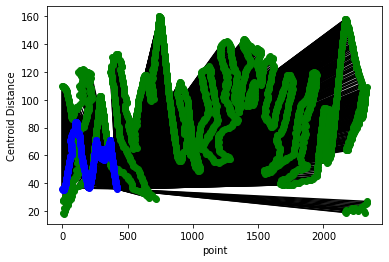

In [46]:
for i in range(0,20):
    x1 = np.arange(0, len(featureVectors[i]))
    x2 = np.arange(0, len(templateFeatureVector))
    plt.xlabel("point")  
    plt.ylabel("Centroid Distance")  
    
    k = 0
    l = 0
    plt.plot([k,l],[featureVectors[i][k],templateFeatureVector[l]],'k-')

    while k < len(dtw_template[i])-2 or l < len(dtw_template[i][0])-2:
        if k == len(dtw_template[i])-2:
            l += 1
        elif l == len(dtw_template[i][0])-2:
            k += 1
        elif np.min([dtw_template[i][k+1, l], dtw_template[i][k, l+1], dtw_template[i][k+1, l+1]]) == dtw_template[i][k+1, l]:
            k += 1
        elif np.min([dtw_template[i][k+1, l], dtw_template[i][k, l+1], dtw_template[i][k+1, l+1]]) == dtw_template[i][k, l+1]:
            l += 1
        else:
            k += 1
            l += 1
        plt.plot([k,l],[featureVectors[i][k],templateFeatureVector[l]],'k-')
                   
    plt.plot(x1, featureVectors[i], 'o', color ="green") 
    plt.plot(x2, templateFeatureVector, 'o', color ="blue")         

    plt.show()

In [52]:
print ("Bell distances")   
print("Bell1:",distance_template[0])
print("Bell2:",distance_template[1])
print("Bell3:",distance_template[2])
print("Bell4:",distance_template[3])
print("Bell5:",distance_template[4])
print("") 


print("Bird distances")    
print("Bird1:",distance_template[5])
print("Bird2:",distance_template[6])
print("Bird3:",distance_template[7])
print("Bird4:",distance_template[8])
print("Bird5:",distance_template[9])
print("") 

print ("Camel distances")    
print("Camel1:",distance_template[10])
print("Camel2:",distance_template[11])
print("Camel3:",distance_template[12])
print("Camel4:",distance_template[13])
print("Camel5:",distance_template[14])
print("") 

print ("Fly distances")   
print("Fly1:",distance_template[15])
print("Fly2:",distance_template[16])
print("Fly3:",distance_template[17])
print("Fly4:",distance_template[18])
print("Fly5:",distance_template[19])
print("") 



Bell distances
Bell1: 7123.13838189891
Bell2: 13091.455458274804
Bell3: 17340.99990421115
Bell4: 40226.86726271748
Bell5: 5807.8750882646245

Bird distances
Bird1: 97445.41422548657
Bird2: 28271.401382073334
Bird3: 304174.9696816453
Bird4: 5114.775755331891
Bird5: 56249.6641877752

Camel distances
Camel1: 52980.91204955722
Camel2: 74587.24979435327
Camel3: 71647.98269887653
Camel4: 68458.66628043137
Camel5: 50512.327491969314

Fly distances
Fly1: 60094.83402038785
Fly2: 78620.84138005797
Fly3: 31014.38344663816
Fly4: 58078.25942790554
Fly5: 61327.0295746361



In [53]:
temp = distance_template.argsort()
ranks = np.empty_like(temp)
ranks[temp] = np.arange(len(distance_template))


print ("Bell ranks")   
print("Bell1:",ranks[0])
print("Bell2:",ranks[1])
print("Bell3:",ranks[2])
print("Bell4:",ranks[3])
print("Bell5:",ranks[4])
print("") 

print("Bird ranks")    
print("Bird1:",ranks[5])
print("Bird2:",ranks[6])
print("Bird3:",ranks[7])
print("Bird4:",ranks[8])
print("Bird5:",ranks[9])
print("") 

print ("Camel ranks")    
print("Camel1:",ranks[10])
print("Camel2:",ranks[11])
print("Camel3:",ranks[12])
print("Camel4:",ranks[13])
print("Camel5:",ranks[14])
print("") 

print ("Fly ranks")   
print("Fly1:",ranks[15])
print("Fly2:",ranks[16])
print("Fly3:",ranks[17])
print("Fly4:",ranks[18])
print("Fly5:",ranks[19])
print("") 

#Form Ranks we can see that all the Bell images comes first then other images

Bell ranks
Bell1: 2
Bell2: 3
Bell3: 4
Bell4: 7
Bell5: 1

Bird ranks
Bird1: 18
Bird2: 5
Bird3: 19
Bird4: 0
Bird5: 10

Camel ranks
Camel1: 9
Camel2: 16
Camel3: 15
Camel4: 14
Camel5: 8

Fly ranks
Fly1: 12
Fly2: 17
Fly3: 6
Fly4: 11
Fly5: 13



In [54]:
fbVectors = [featureVectors[1], featureVectors[2], featureVectors[3], 
            featureVectors[5], featureVectors[6], featureVectors[7],
            featureVectors[9], featureVectors[10], featureVectors[11],
            featureVectors[13], featureVectors[14], featureVectors[15],
            featureVectors[17], featureVectors[18], featureVectors[19]]
comparisonVectors = [featureVectors[0], featureVectors[0], featureVectors[0], 
                     featureVectors[4], featureVectors[4], featureVectors[4],
                     featureVectors[8], featureVectors[8], featureVectors[8],
                     featureVectors[12], featureVectors[12], featureVectors[12],
                     featureVectors[16], featureVectors[16], featureVectors[16]]

In [ ]:
#Feature-Based Matching


In [55]:

dtw_feature =  np.empty(15, dtype=object)
distance_feature = np.zeros(15)

for i in range(15):
    n, m = len(fbVectors[i]), len(comparisonVectors[i])
    dtw_feature[i] = np.zeros((n+1, m+1))
    for k in range(n+1):
        for l in range(m+1):
            dtw_feature[i][k, l] = np.inf
    dtw_feature[i][0, 0] = 0
    
    for k in range(1, n+1):
        cost = abs(fbVectors[i][k-1] - comparisonVectors[i][0])
        last_min = dtw_feature[i][k-1, 0]
        dtw_feature[i][k, 0] = cost + last_min
        
    for l in range(1, m+1):
        cost = abs(fbVectors[i][0] - comparisonVectors[i][l-1])
        last_min = dtw_feature[i][0, l-1]
        dtw_feature[i][0, l] = cost + last_min
    
    for k in range(1, n+1):
        for l in range(1, m+1):
            cost = abs(fbVectors[i][k-1] - comparisonVectors[i][l-1])
            last_min = np.min([dtw_feature[i][k-1, l], dtw_feature[i][k, l-1], dtw_feature[i][k-1, l-1]])
            dtw_feature[i][k, l] = cost + last_min
    
    distance_feature[i] = dtw_feature[i][n, m]

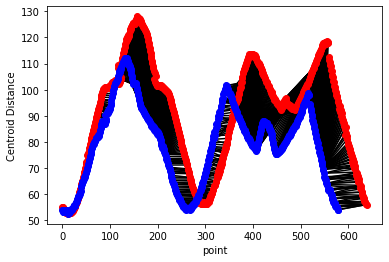

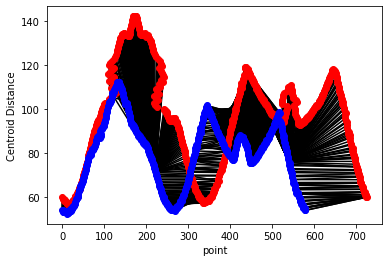

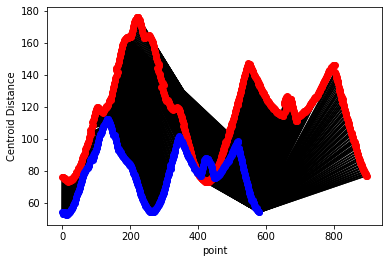

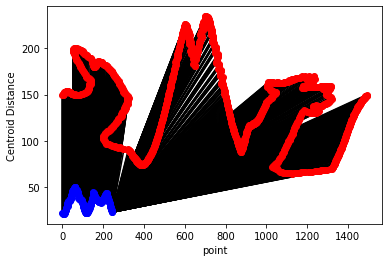

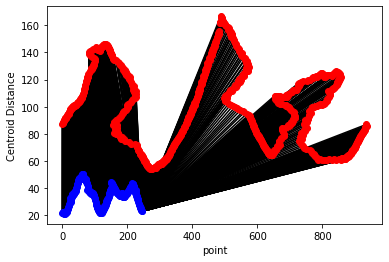

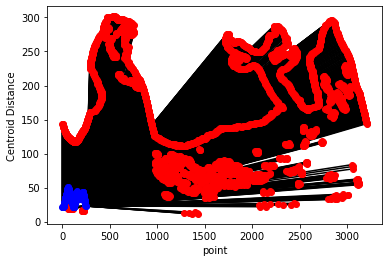

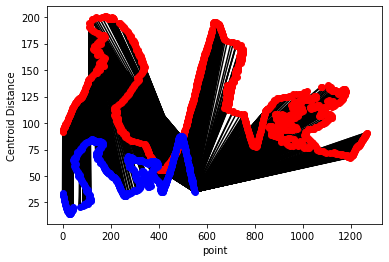

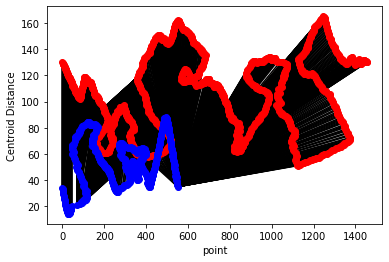

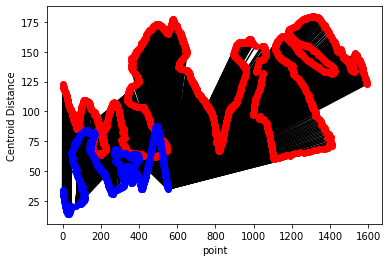

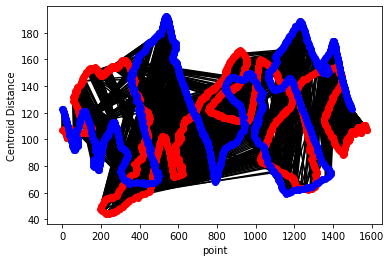

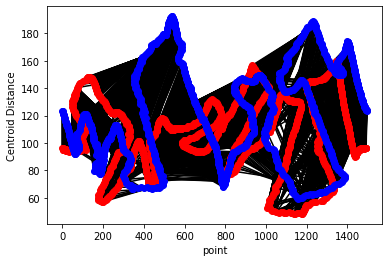

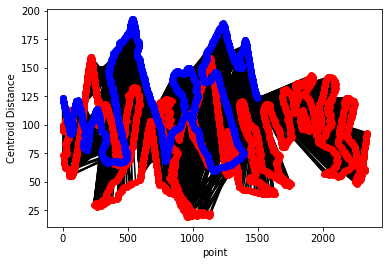

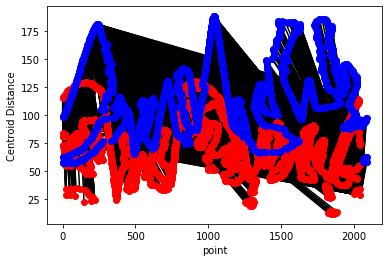

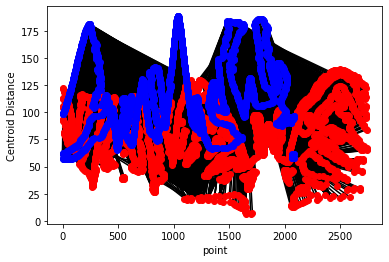

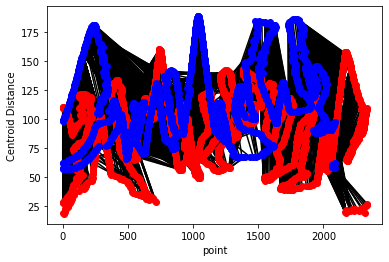

In [57]:
for i in range(0,15):
    x1 = np.arange(0, len(fbVectors[i]))
    x2 = np.arange(0, len(comparisonVectors[i]))
    plt.xlabel("point")  
    plt.ylabel("Centroid Distance")  
    
    k = 0
    l = 0
    plt.plot([k,l],[fbVectors[i][k],comparisonVectors[i][l]],'k-')

    while k < len(dtw_feature[i])-2 or l < len(dtw_feature[i][0])-2:
        if k == len(dtw_feature[i])-2:
            l += 1
        elif l == len(dtw_feature[i][0])-2:
            k += 1
        elif np.min([dtw_feature[i][k+1, l], dtw_feature[i][k, l+1], dtw_feature[i][k+1, l+1]]) == dtw_feature[i][k+1, l]:
            k += 1
        elif np.min([dtw_feature[i][k+1, l], dtw_feature[i][k, l+1], dtw_feature[i][k+1, l+1]]) == dtw_feature[i][k, l+1]:
            l += 1
        else:
            k += 1
            l += 1
        plt.plot([k,l],[fbVectors[i][k],comparisonVectors[i][l]],'k-')
                   
    plt.plot(x1, fbVectors[i], 'o', color ="red") 
    plt.plot(x2, comparisonVectors[i], 'o', color ="blue")         

    plt.show()

In [56]:
print("Bell distances")    
print("Bell2:",distance_feature[0])
print("Bell3:",distance_feature[1])
print("Bell4:",distance_feature[2])
print("")

print ("Bird distances")    
print("Bird2:",distance_feature[3])
print("Bird3:",distance_feature[4])
print("Bird4:",distance_feature[5])
print("")

print ("Camel distances")   
print("Camel2:",distance_feature[6])
print("Camel3:",distance_feature[7])
print("Camel4:",distance_feature[8])
print("") 

print ("Fly distances")
print("Fly2:",distance_feature[9])
print("Fly3:",distance_feature[10])
print("Fly4:",distance_feature[11])
print("") 



Bell distances
Bell2: 2755.144265896843
Bell3: 5020.5937394094435
Bell4: 19759.025067672454

Bird distances
Bird2: 140016.93264017082
Bird3: 49389.313571356426
Bird4: 385185.0445166224

Camel distances
Camel2: 53691.64981469338
Camel3: 52313.515830400676
Camel4: 72007.21645277752

Fly distances
Fly2: 31245.763276188718
Fly3: 31580.78020141008
Fly4: 52228.912760010746

